In [14]:
%run ../../../utils/commonImports.py
%run ../../../utils/tradingImports.py
%matplotlib inline

from base import supres
from exputils import *

# Load data

In [16]:
dropbox_dir = 'D:\\Dropbox\\My work\\krypl-project'
# dropbox_dir = '/Users/david.vesely/Dropbox/My work/krypl-project'
features = ['change_1', 'change_2', 'change_3']
pairs = read_tsv('selected-pairs.tsv', header=None)[0].tolist()

# data_dict = {p: read_all(p, dropbox_dir) for p in pairs}
train = read_tsv('train.tsv')
validation = read_tsv('validation.tsv')

In [17]:
train.head()

,index,support,pair,win_size,date,max_profit,change_1,change_2,change_3,max_profit_consolidated
0,24.0000,0.0021,BTC_ETH,4,2016-01-01 12:00:00,0.0725,0.0000,0.0000,0.0000,-0.0000
1,33.0000,0.0022,BTC_ETH,4,2016-01-01 16:30:00,0.0543,0.0089,0.0000,0.0000,-0.0089
2,45.0000,0.0022,BTC_ETH,4,2016-01-01 22:30:00,0.0680,-0.0015,0.0074,0.0000,0.0015
3,58.0000,0.0022,BTC_ETH,4,2016-01-02 05:00:00,0.0441,0.0234,0.0218,0.0309,-0.0234
4,70.0000,0.0022,BTC_ETH,4,2016-01-02 11:00:00,0.0387,0.0034,0.0269,0.0253,-0.0034


In [18]:
validation.head()

,index,support,pair,win_size,date,max_profit,change_1,change_2,change_3,max_profit_consolidated
0,"17,580.0000",0.0086,BTC_ETH,4,2017-01-01 06:00:00,-0.0050,0.0432,0.0444,0.0367,-0.0432
1,"17,589.0000",0.0084,BTC_ETH,4,2017-01-01 10:30:00,0.0144,-0.0279,0.0141,0.0152,0.0144
2,"17,598.0000",0.0085,BTC_ETH,4,2017-01-01 15:00:00,-0.0019,0.0077,-0.0204,0.0219,-0.0077
3,"17,603.0000",0.0083,BTC_ETH,4,2017-01-01 17:30:00,0.0011,-0.0189,-0.0113,-0.0389,0.0011
4,"17,610.0000",0.0081,BTC_ETH,4,2017-01-01 21:00:00,0.4283,-0.0283,-0.0466,-0.0393,0.0283


# Train validation split

In [19]:
from sklearn.model_selection import train_test_split

X_train = train[features].values
y_train = train['max_profit_consolidated'].values

X_val = validation[features].values
y_val = validation['max_profit_consolidated'].values

# Report

In [20]:
from sklearn.metrics import mean_squared_error

def plt_reg(x, y, ax, title, xlabel, ylabel):
    sns.regplot(x, y, ax=ax)
    ax.set_title(title, fontproperties=title_font)
    ax.set_xlabel(xlabel, fontproperties=axis_font)
    ax.set_ylabel(ylabel, fontproperties=axis_font)

def reg_report(X, y_true, reg):
    y_pred = reg.predict(X)
    ms_err = mean_squared_error(y_true, y_pred)
    print('Mean squared error', ms_err)
    
    _, axes = plt.subplots(1, 2, figsize=[13, 5])
    plt_reg(X[:, 0], y_true, axes[0], 'True', 'change_1', 'y_true')
    plt_reg(X[:, 0], y_pred, axes[1], 'Predicted', 'change_1', 'y_pred')
    
    plt.figure(figsize=[12, 6])
    sns.regplot(y_true, y_pred)
    plt.xlabel('y_true', fontproperties=axis_font)
    plt.ylabel('y_pred', fontproperties=axis_font)
    plt.title('True - Pred comparison', fontproperties=title_font)

# Linear regression

In [21]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Train set report

Mean squared error 9.071363332598559e-05


C:\Users\david.vesely\AppData\Local\conda\conda\envs\crypto36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


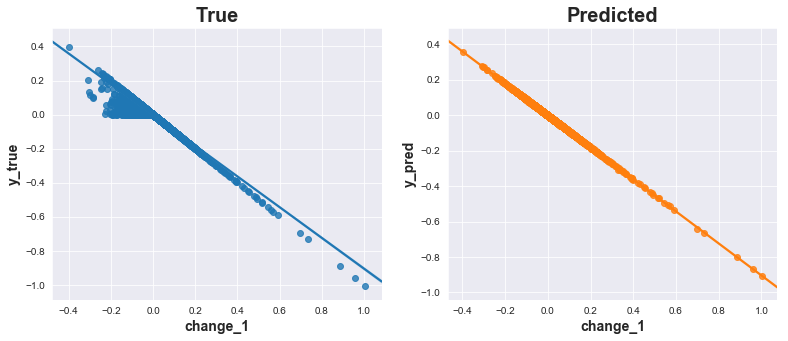

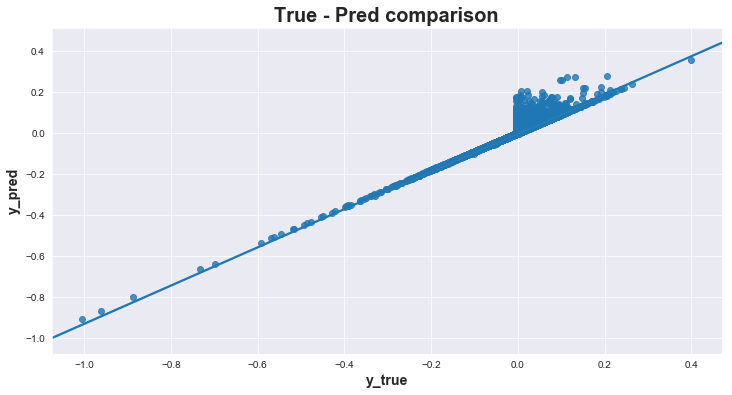

In [22]:
y_true = y_train
reg_report(X_train, y_true, reg)

### Validation set report

Mean squared error 0.00013150092349718695


C:\Users\david.vesely\AppData\Local\conda\conda\envs\crypto36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


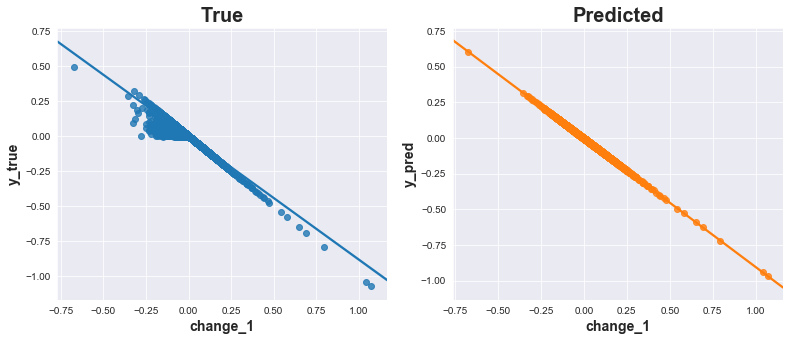

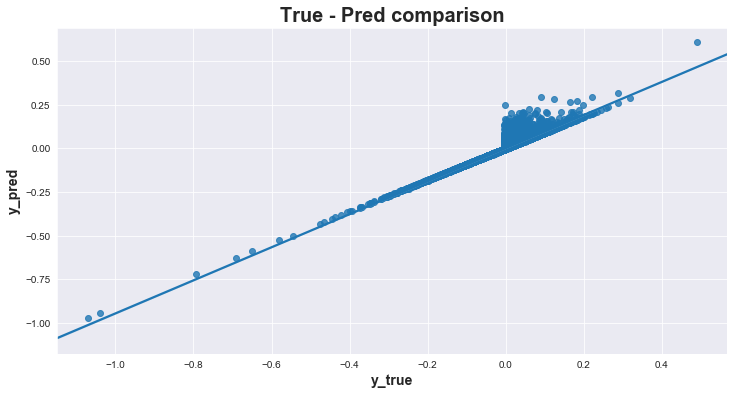

In [23]:
y_true = y_val
reg_report(X_val, y_true, reg)

# Save Regression

In [24]:
from sklearn.linear_model import LinearRegression
save_model(reg, 'models/lin_regression.pkl')